In [340]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [308]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [309]:
data.rename(columns={"date": "Date"}, inplace=True)

In [310]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [311]:
data['Date'] = data['Date'].str.split(' ').str[0]


In [312]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [313]:

company_to_filter = 'AAPL'
data_filtered =data[data['stock'] == company_to_filter]

In [314]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL


In [315]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [316]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL


In [317]:
data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_15292\1231557142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)


In [318]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock,sentiment
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.433333
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.000000
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.500000
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.000000
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.000000


In [319]:
data_filtered[['Date', 'headline', 'sentiment']].head()

,Date,headline,sentiment
6680,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,0.433333
6681,2020-06-10,10 Biggest Price Target Changes For Wednesday,0.000000
6682,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",0.500000
6683,2020-06-10,"Deutsche Bank Maintains Buy on Apple, Raises P...",0.000000
6684,2020-06-10,Apple To Let Users Trade In Their Mac Computer...,0.000000


In [320]:
new_data_filtered = data_filtered.loc[:, ['Date', 'sentiment']]
new_data_filtered.head()

,Date,sentiment
6680,2020-06-10,0.433333
6681,2020-06-10,0.000000
6682,2020-06-10,0.500000
6683,2020-06-10,0.000000
6684,2020-06-10,0.000000


In [321]:
stock_data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\AMZN.csv")

In [322]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-03,98.768501,99.816498,94.404503,95.449501,95.449501,150690000
1,2020-03-04,97.328499,98.900002,96.099998,98.791496,98.791496,95458000
2,2020-03-05,96.650002,98.036003,95.500000,96.201500,96.201500,94964000
3,2020-03-06,93.750000,95.543503,93.474998,95.054497,95.054497,105472000
4,2020-03-09,88.693001,93.138496,88.064499,90.030502,90.030502,156264000


In [323]:
#stock_data= stock_data.index
new_stock_data=pd.DataFrame(stock_data, columns=['Date','Close'])

In [324]:
new_stock_data.head()

,Date,Close
0,2020-03-03,95.449501
1,2020-03-04,98.791496
2,2020-03-05,96.201500
3,2020-03-06,95.054497
4,2020-03-09,90.030502


In [325]:
#print(new_data_filtered['Date'].min(), new_data_filtered['Close'].max())
#print(stock_data.index.min(), stock_data.index.max())

In [326]:
print(new_stock_data.columns)

Index(['Date', 'Close'], dtype='object')


In [327]:
# Aligning sentiment scores with the stock closing prices on the same date
#new_data_filtered= 
#new_stock_data = 
combined_data= new_data_filtered.set_index('Date').join(new_stock_data.set_index('Date'))
#combined_data.head()

In [328]:
print(new_stock_data[['Close']])

         Close
0    95.449501
1    98.791496
2    96.201500
3    95.054497
4    90.030502
..         ...
59  120.519501
60  120.055000
61  122.118500
62  123.552002
63  123.620499

[64 rows x 1 columns]


In [329]:
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.433333,NaN
2020-06-10,0.000000,NaN
2020-06-10,0.500000,NaN
2020-06-10,0.000000,NaN
2020-06-10,0.000000,NaN


In [330]:
combined_data.tail()

,sentiment,Close
Date,,
2020-03-10,0.000000,94.591003
2020-03-10,0.000000,94.591003
2020-03-09,-0.466667,90.030502
2020-03-09,0.000000,90.030502
2020-03-09,0.000000,90.030502


In [331]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

C:\Users\befekadum\AppData\Local\Temp\ipykernel_15292\707584225.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [332]:
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: 0.08333940079684768


In [333]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.06268300992492613


In [337]:
# Calculate daily returns (percentage change in closing price)
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

# Drop any rows with NaN values (e.g., the first row after pct_change)
#combined_data.dropna(inplace=True)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_15292\3748235246.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [338]:
correlation_matrix = combined_data.corr()

In [339]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               sentiment     Close  Daily Returns
sentiment       1.000000  0.062683       0.083339
Close           0.062683  1.000000       0.057675
Daily Returns   0.083339  0.057675       1.000000


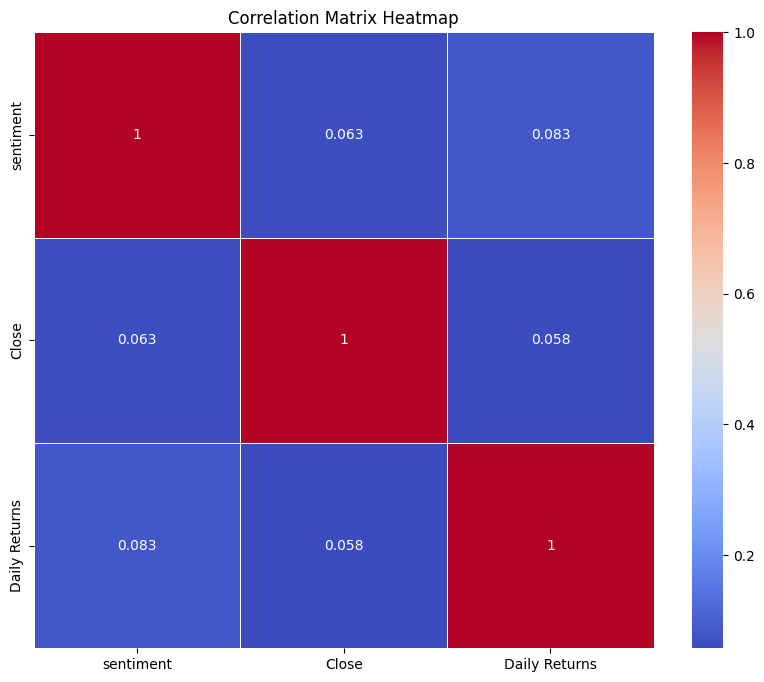

In [341]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()